<img style="float: right;" src="files/thehyve_logo.png">
# Pathway analysis
---------------
Copyright (c) 2015 The Hyve B.V. This notebook is licensed under the GNU General Public License, version 3. Authors: Ruslan Forostianov, Pieter Lukasse.

## Before running other code cells: Authenticate with tranSMART

In [25]:
import getpass
from transmart_api import TransmartApi

api = TransmartApi(
    host = 'http://localhost:8080',
    user = raw_input('Username:'),
    password = getpass.getpass('Password:'))

api.access()

Username:admin
Password:········


'SUCCESS'

# Part 1
------------------------------
## Get observations data

We start by importing pandas utility package:

In [26]:
import pandas

pandas.set_option('max_colwidth', 1000)
pandas.set_option("display.max_rows",100)

Pandas is useful for converting the JSON format, received by the REST API, into an easy to use Python [Pandas DataFrame object](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [28]:
from pandas.io.json import json_normalize

study_id = 'GSE8581'
obs = api.get_observations(study = study_id)
obs_df1 = json_normalize(obs)

In [29]:
obs_df1

,label,subject.age,subject.birthDate,subject.deathDate,subject.id,subject.inTrialId,subject.maritalStatus,subject.race,subject.religion,subject.sex,subject.trial,value
0,\Public Studies\GSE8581\Biomarker Data\GPL570\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,None
1,\Public Studies\GSE8581\Endpoints\Diagnosis\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,non-small cell adenocarcinoma
2,\Public Studies\GSE8581\Endpoints\FEV1\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,1.41
3,\Public Studies\GSE8581\Endpoints\Forced Expiratory Volume Ratio\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,51
4,\Public Studies\GSE8581\Subjects\Age\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,65
5,\Public Studies\GSE8581\Subjects\Height (inch)\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,66
6,\Public Studies\GSE8581\Subjects\Lung Disease\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,chronic obstructive pulmonary disease
7,\Public Studies\GSE8581\Subjects\Organism\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,Homo sapiens
8,\Public Studies\GSE8581\Subjects\Race\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,Afro American
9,\Public Studies\GSE8581\Subjects\Sex\,65,None,None,1000384597,GSE8581GSM210006,None,Afro American,None,FEMALE,GSE8581,female


Here we reorganize the data such that each line represents a subject and the columns represent the different clinical attributes.

In [30]:
obs_df2 = obs_df1.pivot(index = 'subject.inTrialId', columns = 'label', values = 'value')
obs_df3 = obs_df2.convert_objects()
obs_df4 = obs_df3.rename(
    columns = lambda c: c.replace('\Public Studies\GSE8581\\', '')[:-1],
    inplace = False)
obs_df4

label,Biomarker Data\GPL570,Endpoints\Diagnosis,Endpoints\FEV1,Endpoints\Forced Expiratory Volume Ratio,Subjects\Age,Subjects\Height (inch),Subjects\Lung Disease,Subjects\Organism,Subjects\Race,Subjects\Sex
subject.inTrialId,,,,,,,,,,
GSE8581GSM210004,None,non-small cell squamous cell carcinoma,2.54,58.00,63,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210005,None,non-small cell adenocarcinoma,1.69,83.66,84,60,control,Homo sapiens,Afro American,female
GSE8581GSM210006,None,non-small cell adenocarcinoma,1.41,51.00,65,66,chronic obstructive pulmonary disease,Homo sapiens,Afro American,female
GSE8581GSM210007,E,non-small cell adenocarcinoma,2.51,80.96,46,66,not specified,Homo sapiens,Caucasian,male
GSE8581GSM210008,E,non-small cell adenocarcinoma,1.64,57.00,53,65,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,female
GSE8581GSM210009,E,non-small cell squamous cell carcinoma,2.72,74.00,53,64,control,Homo sapiens,Caucasian,female
GSE8581GSM210010,E,non-small cell adenocarcinoma,1.45,73.00,77,63,not specified,Homo sapiens,Caucasian,female
GSE8581GSM210011,E,non-small cell squamous cell carcinoma,1.87,56.00,56,72,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,male
GSE8581GSM210012,E,non-small cell adenocarcinoma,2.76,70.58,61,69,not specified,Homo sapiens,Caucasian,male


Split the **control** and **chronic obstructive pulmonary disease** sets:

In [31]:
control = obs_df4['Subjects\Lung Disease'] == 'control'
treatment = obs_df4['Subjects\Lung Disease'] == 'chronic obstructive pulmonary disease'

Some basic statistics comparing the numerical attributes of both sets:

In [32]:
obs_df4[control].describe()

,Endpoints\FEV1,Endpoints\Forced Expiratory Volume Ratio,Subjects\Age,Subjects\Height (inch)
count,19.000000,19.000000,19.000000,19.000000
mean,2.618421,77.448421,64.105263,65.842105
std,0.737219,4.540892,11.503114,4.193423
min,1.370000,71.000000,40.000000,58.000000
25%,2.080000,74.000000,55.000000,63.000000
50%,2.590000,76.000000,67.000000,65.000000
75%,2.970000,80.930000,71.000000,69.000000
max,4.040000,86.000000,84.000000,75.000000


In [33]:
obs_df4[treatment].describe()

,Endpoints\FEV1,Endpoints\Forced Expiratory Volume Ratio,Subjects\Age,Subjects\Height (inch)
count,17.000000,17.000000,17.000000,17.000000
mean,1.265882,53.523529,65.058824,66.176471
std,0.594433,9.205130,8.554754,4.530939
min,0.400000,41.000000,52.000000,58.000000
25%,0.880000,45.000000,59.000000,63.000000
50%,1.290000,54.000000,64.000000,66.000000
75%,1.640000,58.000000,72.000000,71.000000
max,2.540000,78.000000,79.000000,73.000000


# Part 2 - Retrieving molecular (aka "high dimensional") data
------------------


## Downloading the expression data for our chosen study

This can take a while (~1 minute)

In [41]:
(hdHeader, hdRows) = api.get_hd_node_data(study = study_id,
                                          node_name = 'Lung',
                                          projection='log_intensity')

Select only the data rows where the probes are mapped to a gene (aka bioMarker). Gene ID\probe ID will form the row names while the patientId values are used for the columns.

In [42]:
rows = [row.value[0].doubleValue._values for row in hdRows if row.bioMarker != 'null']
row_names = [row.bioMarker + "\\" + row.label for row in hdRows if row.bioMarker != 'null']
col_names = [assay.patientId for assay in hdHeader.assay]

Build the table as a DataFrame in Pandas:

In [43]:
from pandas import DataFrame

hd_df = DataFrame(rows, columns = col_names, index = row_names)
hd_df

,GSE8581GSM213034,GSE8581GSM212811,GSE8581GSM213036,GSE8581GSM212075,GSE8581GSM211008,GSE8581GSM210090,GSE8581GSM212855,GSE8581GSM212070,GSE8581GSM212810,GSE8581GSM210193,...,GSE8581GSM210979,GSE8581GSM213017,GSE8581GSM211007,GSE8581GSM210192,GSE8581GSM213020,GSE8581GSM210994,GSE8581GSM210010,GSE8581GSM210011,GSE8581GSM210007,GSE8581GSM213019
KIAA1377\235956_at,6.461792,7.461758,6.907191,7.775558,7.308785,6.286654,4.924318,8.004900,2.411315,6.670685,...,7.888354,6.538960,7.314416,5.892823,6.554481,7.427330,5.623677,5.559804,6.104142,6.969680
ZNF358\226260_x_at,4.969012,1.053695,5.064348,4.766791,3.559235,4.967538,4.085595,4.767745,-1.447194,4.025853,...,4.780016,4.606946,5.232454,4.568361,4.537433,3.196739,3.986893,4.851469,3.962614,5.654816
GPR135\214503_x_at,0.313037,-1.114216,0.569997,-0.156695,0.268782,0.108009,1.087890,1.194270,-1.321647,0.938911,...,0.686541,0.696047,1.137484,0.213963,0.964066,-0.252259,0.214336,0.566046,0.067900,-0.266347
GPATCH2\242224_at,4.989094,4.451818,4.066089,4.839037,4.612494,4.843898,3.584397,5.486096,-1.439762,5.385900,...,5.263271,3.356482,5.831609,4.992265,5.039222,5.572077,4.678433,4.641962,4.997518,5.041904
RPL24\214143_x_at,12.746451,12.414838,12.393632,12.335932,12.488262,12.386385,12.630738,12.627675,-1.703159,12.229774,...,12.501332,12.276255,12.471353,12.024201,12.642733,12.585993,12.109086,11.953891,11.624786,13.002877
PALM2\1554640_at,4.713311,4.580507,4.187253,5.226393,2.517850,3.331075,6.681140,6.004290,2.274962,4.748209,...,5.663384,5.626687,6.290896,4.591548,5.503263,5.310369,4.924789,5.146977,5.019933,5.911052
LOC339316\242084_at,0.759616,0.678216,3.717528,-0.063451,2.928876,0.940558,1.084091,1.457789,2.189900,-0.265294,...,1.123342,0.006305,4.473248,-0.392482,0.871686,1.391069,-0.194356,0.083697,3.514753,1.218781
FECH\203115_at,5.924822,5.616725,4.892148,5.171583,5.930726,5.670852,4.090447,6.350764,-1.860861,5.720448,...,6.834496,5.207846,5.843306,5.312484,4.892386,5.718230,5.333832,4.882795,5.789813,6.214107
KCNJ9\207527_at,3.415177,2.037192,3.383345,3.765651,3.043836,4.304745,2.253039,3.360196,-1.547046,4.613791,...,4.069548,3.205654,3.604522,2.567180,3.076275,3.840896,3.597162,1.285207,1.642979,4.039182
C21orf96\220918_at,5.862719,5.615584,6.010954,6.295001,4.157214,4.917064,4.885101,5.563570,2.084779,5.801756,...,5.384008,3.163640,5.905125,4.462373,5.391685,4.537215,5.284943,4.878632,4.544145,6.354914


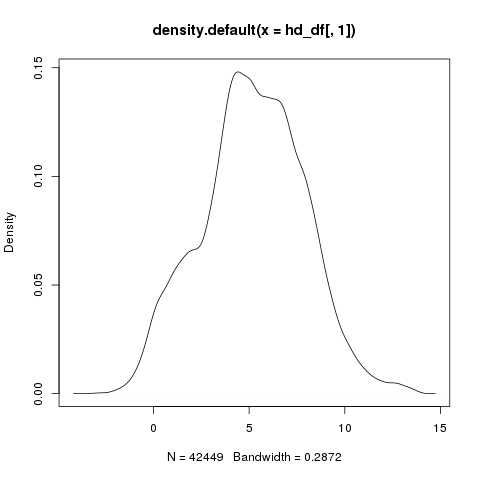

In [48]:
%%R -i hd_df

plot(density(hd_df[,1]))

Using the **control** and **treatment** sets made a few cells above, we build the "design" data frame showing which subjects are part of which set.

In [49]:
design_df = DataFrame({'control': control[col_names], 'treatment': treatment[col_names]})
design_df

,control,treatment
subject.inTrialId,,
GSE8581GSM213034,False,False
GSE8581GSM212811,True,False
GSE8581GSM213036,True,False
GSE8581GSM212075,False,True
GSE8581GSM211008,True,False
GSE8581GSM210090,False,False
GSE8581GSM212855,False,False
GSE8581GSM212070,True,False
GSE8581GSM212810,False,True


### Calling R differential analysis code (aka Advanced Analysis>'Marker Selection' in tranSMART)

Here we pass the data frames, initialized above in Python, to R. Jupyter will convert this to R. Handy feature!! Now we can also reuse all the nice R libraries which are not (yet) in Python.

In [50]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


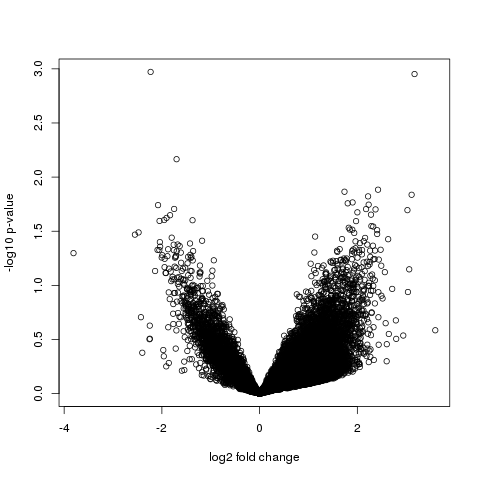

In [51]:
%%R -i hd_df -i design_df -o top_fit

library(limma)

design.matrix <- sapply(design_df, as.numeric)
contrast.matrix <- makeContrasts(control - treatment, levels = design.matrix)

fit <- lmFit(hd_df, design.matrix)
fit <- contrasts.fit(fit, contrast.matrix)
fit <- eBayes(fit)

contr=1
log_fc = fit$coefficients[, contr]/log(2)
p_value = -log10(fit$p.value[, contr])
plot(log_fc, p_value, ylab="-log10 p-value", xlab="log2 fold change")

# alternative plots log fc x log odds: 
#volcanoplot(fit)

# "send" data back to Python: make a dataframe containing the important data and store 
# in top_fit (the "-o" variable above) so that it can be accessed in python code 
# in the subsequent code cells of this notebook (see flag '-o top_fit' above):
top_fit = data.frame(
    probe = rownames(fit$coefficients),
    log_fc = fit$coefficients[, contr],
    t = fit$t[, contr],
    p_value = fit$p.value[, contr],
    b = fit$lods[, contr],
    stringsAsFactors = FALSE
)

In [52]:
top_fit

,probe,log_fc,t,p_value,b
0,KIAA1377\235956_at,0.879185,0.576089,0.566838,-4.598590
1,ZNF358\226260_x_at,0.516999,0.481906,0.631730,-4.599110
2,GPR135\214503_x_at,-0.037486,-0.105517,0.916339,-4.600272
3,GPATCH2\242224_at,0.245595,0.215820,0.829904,-4.600085
4,RPL24\214143_x_at,1.012177,0.364221,0.717050,-4.599632
5,PALM2\1554640_at,0.198167,0.165797,0.868907,-4.600186
6,LOC339316\242084_at,0.001682,0.003089,0.997546,-4.600330
7,FECH\203115_at,0.895703,0.707561,0.482120,-4.597713
8,KCNJ9\207527_at,0.148250,0.182965,0.855479,-4.600154
9,C21orf96\220918_at,0.286274,0.241679,0.809902,-4.600023


## Filtering results on p-value

Back to Python....we can access **top_fit** variable because it was passed above as an "output" parameter to the R code. We use it to select the probes below a specific p-value threshold.

In [57]:
top_probes = top_fit[top_fit.p_value < 0.05] \
              .set_index(['probe']).sort(['p_value'], ascending = True)
top_probes

,log_fc,t,p_value,b
probe,,,,
IL1F8\224230_at,-1.546104,-3.449570,0.001067,-4.548413
LOC400590\1560992_at,2.197704,3.434648,0.001117,-4.548785
ANGEL1\244685_at,-1.178030,-2.807717,0.006833,-4.563804
GRK7\1552929_at,1.679992,2.562875,0.013065,-4.569267
FLJ33996\237790_at,1.203864,2.546120,0.013639,-4.569630
POSTN\214981_at,2.156220,2.520897,0.014548,-4.570174
LOC100507153\1568762_at,1.538902,2.507401,0.015056,-4.570464
GPR17\206190_at,1.318751,2.456309,0.017129,-4.571554
TTC39A\217101_at,1.249650,2.448672,0.017460,-4.571715


In [58]:
def get_gene_name(probe):
    return probe.split('\\')[0]

top_probes['gene_name'] = top_probes.index.map(get_gene_name)
top_probes

,log_fc,t,p_value,b,gene_name
probe,,,,,
IL1F8\224230_at,-1.546104,-3.449570,0.001067,-4.548413,IL1F8
LOC400590\1560992_at,2.197704,3.434648,0.001117,-4.548785,LOC400590
ANGEL1\244685_at,-1.178030,-2.807717,0.006833,-4.563804,ANGEL1
GRK7\1552929_at,1.679992,2.562875,0.013065,-4.569267,GRK7
FLJ33996\237790_at,1.203864,2.546120,0.013639,-4.569630,FLJ33996
POSTN\214981_at,2.156220,2.520897,0.014548,-4.570174,POSTN
LOC100507153\1568762_at,1.538902,2.507401,0.015056,-4.570464,LOC100507153
GPR17\206190_at,1.318751,2.456309,0.017129,-4.571554,GPR17
TTC39A\217101_at,1.249650,2.448672,0.017460,-4.571715,TTC39A


Map the gene names to Entrez Gene IDs (which are supported by KEGG API).
The output table shows **top_probes** again, now with mapped gene_id column:

In [59]:
from utils import Entrez

entrez = Entrez()

top_probes['gene_id'] = top_probes.gene_name.map(entrez.get_gene_id)
top_probes

,log_fc,t,p_value,b,gene_name,gene_id
probe,,,,,,
IL1F8\224230_at,-1.546104,-3.449570,0.001067,-4.548413,IL1F8,None
LOC400590\1560992_at,2.197704,3.434648,0.001117,-4.548785,LOC400590,400590
ANGEL1\244685_at,-1.178030,-2.807717,0.006833,-4.563804,ANGEL1,23357
GRK7\1552929_at,1.679992,2.562875,0.013065,-4.569267,GRK7,131890
FLJ33996\237790_at,1.203864,2.546120,0.013639,-4.569630,FLJ33996,283401
POSTN\214981_at,2.156220,2.520897,0.014548,-4.570174,POSTN,10631
LOC100507153\1568762_at,1.538902,2.507401,0.015056,-4.570464,LOC100507153,100507153
GPR17\206190_at,1.318751,2.456309,0.017129,-4.571554,GPR17,2840
TTC39A\217101_at,1.249650,2.448672,0.017460,-4.571715,TTC39A,22996


## Search via the KEGG API
Here we use our custom Python class **Kegg** which calls the KEGG API to find the pathways in KEGG that match one or more of the gene_ids. The output table displays the **top_probes** again, now with a column containing the pathway(s) in which this gene is found. The pathway names are also links to their corresponding entry in the KEGG website.
We expect some genes to be found in one pathway, some genes in many pathways and many genes in none of the pathways.

In [60]:
from utils import Kegg
# find the pathways in KEGG that match one or more of the gene_ids:
kegg = Kegg(gene_ids = top_probes.gene_id)

top_probes['pathways_ids'] = top_probes.gene_id.map(kegg.get_pathways_image_links_by_gene)

from IPython.display import HTML
HTML(top_probes.to_html(escape=False))

,log_fc,t,p_value,b,gene_name,gene_id,pathways_ids
probe,,,,,,,
IL1F8\224230_at,-1.546104,-3.449570,0.001067,-4.548413,IL1F8,None,[]
LOC400590\1560992_at,2.197704,3.434648,0.001117,-4.548785,LOC400590,400590,[]
ANGEL1\244685_at,-1.178030,-2.807717,0.006833,-4.563804,ANGEL1,23357,[]
GRK7\1552929_at,1.679992,2.562875,0.013065,-4.569267,GRK7,131890,"[hsa04062, hsa04144, hsa04744]"
FLJ33996\237790_at,1.203864,2.546120,0.013639,-4.569630,FLJ33996,283401,[]
POSTN\214981_at,2.156220,2.520897,0.014548,-4.570174,POSTN,10631,[]
LOC100507153\1568762_at,1.538902,2.507401,0.015056,-4.570464,LOC100507153,100507153,[]
GPR17\206190_at,1.318751,2.456309,0.017129,-4.571554,GPR17,2840,[]
TTC39A\217101_at,1.249650,2.448672,0.017460,-4.571715,TTC39A,22996,[]


## Results + KEGG visualization
Here we select the pathways that match 2 or more genes. The pathway name is also a link to the KEGG visualization, which displays the pathway and all the genes of our dataset that were found in this pathway. The genes of our dataset are highlighted in red in the KEGG visualization. The figure below shows this.

<img style="float: left;" src="files/hsa04723.png">

In [61]:
pathways_df = DataFrame(kegg.get_all_pathways_rows(), columns=['link to pathway', 'nr genes matched'])

pathways_df = pathways_df[pathways_df['nr genes matched'] > 1].sort(['nr genes matched'], ascending = False)

HTML(pathways_df.to_html(escape=False))

,link to pathway,nr genes matched
42,hsa05202,4
65,hsa04080,3
17,hsa04060,3
56,hsa01100,3
53,hsa04151,3
40,hsa05200,2
62,hsa00230,2
45,hsa04910,2
41,hsa05203,2
5,hsa04630,2


# Exercise 
------------------------
Change p-value constraint to 0.05 in step [Filtering results on p-value](#Filtering-results-on-p-value)


In [19]:
# optional exercise: duplicate only the necessary code here, now with new p-value. 
# Generate only the table with the list of pathways and 'nr of genes matched' 